In [2]:
# Среднеквадратическая ошибка (MSE).

# Даны матрица с наблюдениями, вектор с ответами и вектор с весовыми коэффициентами и записаны в переменные X, y и w соответственно. 
# Рассчитайте среднеквадратическую ошибку по формуле

# loss = ((y - X @ w)**2).mean(axis=0)

In [3]:
import numpy as np

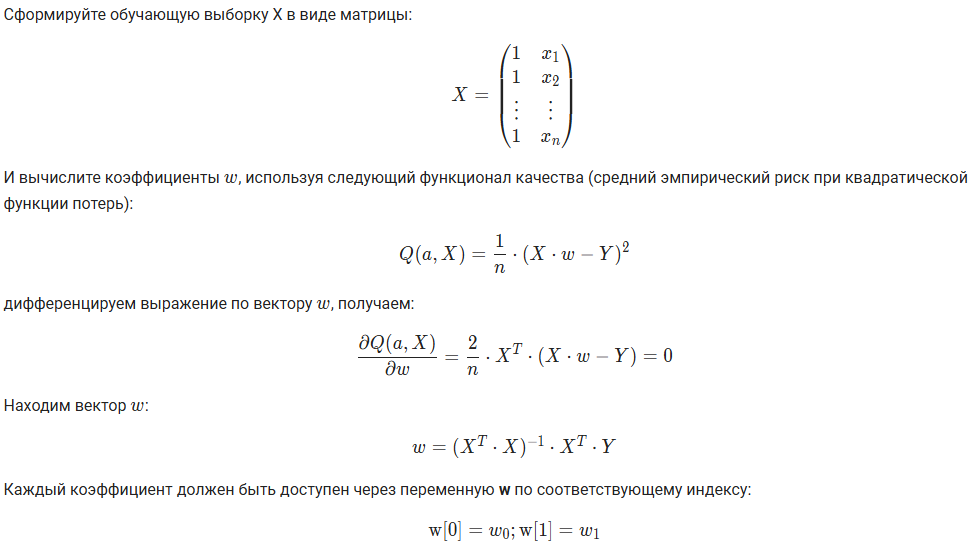

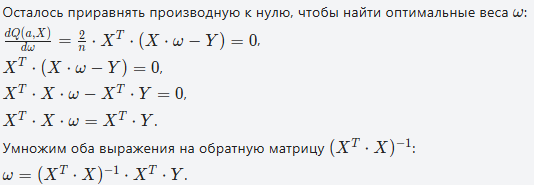

In [4]:
# Необходимо вычислить коэффициенты w модели: a(x,w)=w0 + w1 * x
# Алгоритм решения выше

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

# здесь продолжайте программу
X = x.reshape(len(x), 1)
X = np.c_[np.ones(X.shape[0]), X] #
X_T = np.transpose(X)
X_T_X = X_T @ X
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_y = X_T @ Y
w = X_T_y @ X_T_X_inv
w

array([-5.14605924,  0.64014601])